In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [4]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [7]:
#正規化(normalization)
#原因: 將不同類型或不同單位的數值輸入神經網路會有問題
#方式: 對輸入資料中的每個特徵值，減去特徵的平均值並除以標準差(standard deviation)
#  -> 特徵數值以0為中心，並以標準差為單位刻度

mean = train_data.mean(axis=0) #沿第0軸(batch_size軸)做平均
std = train_data.std(axis=0) #第0軸(batch_size軸)算標準差

In [8]:
train_data -= mean
train_data /= std

#正規化測試資料，需使用訓練資料集來計算mean和std
#不能使用源自測試資料集的數值，防止資料洩漏
test_data -= mean
test_data /= std

In [9]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
#建立神經網路
#擁有訓練資料越少，過度配適的情形越嚴重，因為容易被記起來
#使用小型神經網路(隱藏層少)是緩解過度配適的方法之一
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )),
        layers.Dense(64, activation='relu'),
        layers.Dense(1) #單一unit結束，沒有啟動函數 -> 線性層，因為純量迴歸會輸出浮點數型別的數值(迴歸值)，而啟動函數會限制輸出值的範圍
                        #ex: sigmoid只能預測0與1間的數值，而純線性的神經網路則可自由地預測任何範圍內的值
    ])
    
    model.compile(optimizer='rmsprop',
                 loss='mse', #mean squared error 均方差，計算預測值和目標值之間差異的平方，迴歸問題常用的損失函數
                 metrics=['mae']) #mean absolute error 平均絕對誤差，預測值和目標值之間差異的絕對值
    
    return model

In [12]:
#K折(K-fold)驗證
#因為訓練資料少，拆成的驗證集少，驗證分數會因驗證資料集切割的不同，產生很大的變異性(variance)

#K折交叉驗證(K-fold cross validation)
#將訓練資料拆成K個區塊，保持模型不變之狀況下，每次取其1區塊作為驗證集，共跑K次，驗證分數為K次驗證分數之平均值

In [13]:
k = 4 #進行4折交叉驗證
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    #驗證集:
    val_data = train_data[i * num_val_samples : (i + 1) *  num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    #訓練集:
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model() #建構keras模型(已compile)
    #訓練模型
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs,
             batch_size=1,
             verbose=0) #在silent靜音模式下verbose = 0
    
    #驗證模型
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0


2022-08-10 04:55:41.950824: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-10 04:55:42.295819: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_scores

[2.1812174320220947, 2.402306079864502, 2.6275060176849365, 2.5083675384521484]

In [15]:
np.mean(all_scores)

2.4298492670059204

In [16]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    #驗證集:
    val_data = train_data[i * num_val_samples : (i + 1) *  num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    #訓練集:
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model() #建構keras模型(已compile)
    #訓練模型
    history = model.fit(partial_train_data, partial_train_targets,
                     validation_data=(val_data, val_targets),
                     epochs=num_epochs,
                     batch_size=1,
                     verbose=0) #在silent靜音模式下verbose = 0

    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
#建立連續平均K折驗證分數的歷史
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

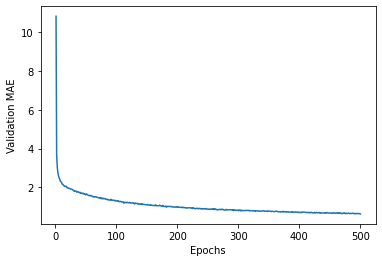

In [18]:
#繪製驗證分數
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [19]:
#排除前十資料點，並將每個點替換成前一個點的指數移動平均值(EMA: exponential moving average)
#E(t) = a * V(t) + (1 - a) * E(t-1)
#E(t): 時間點t的指數移動平均值, a: 平滑指數(通常介於0~1), V(t): 時間點t的原始數值, E(t-1): 時間點t-1的指數移動平均值

def smooth_curve(points, factor=0.9): #平滑指數為0.9
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor)) #指數移動平均數
        else:
            smoothed_points.append(point)
    
    return smoothed_points

In [20]:
smooth_mae_history = smooth_curve(average_mae_history[10:]) #排除前十筆資料

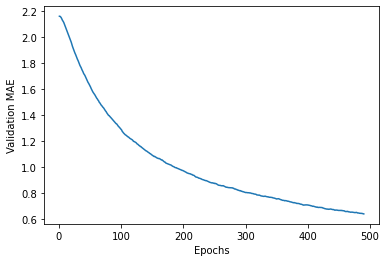

In [21]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [22]:
#訓練最終模型(假設MAE在epochs=80後開始上升 -> overfitting(過度適配))
#調整epochs, batch_size, 隱藏層大小、層數, 模型參數
model = build_model()
model.fit(train_data, train_targets,
         epochs = 80, 
         batch_size=16,
         verbose=0)

In [23]:
#測試集結果
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.9311 - mae: 2.5054


In [24]:
test_mae_score

2.5053725242614746